# Tennis (Multi-agent Problem)¶

Use this notebook to train and/or test your agent for the Tennis environment. Follow the instructions below to get started!

## 1. Start the Environment
Run the next code cell to install a few packages. This line will take a few minutes to run!

In [1]:
!pip -q install ./python tqdm

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.

Please select one of the two options below for loading the environment.

## 2. Loading the Environment for Training¶
It automatically detects the platform and assigns the right file to the UnityEnvironment. The assumption is that the computer is 64 bit.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import platform

platform_files = {"Windows":r".\ENVs\Tennis_Windows_x86_64\Tennis.exe",
                 "Linux":r"./ENVs/Tennis_Linux/Tennis.x86_64",
                 "Darwin":r"./ENVs/Tennis.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file , no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## 3. Initializing our agent with environment parameters:

In [3]:
from src.agent import Agent
from collections import deque

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

# Here we initialize two agents
# We set the states size to 48 (24*2), so we can feed each agent boths agent's state observations.
agent_1 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)
agent_2 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)

## 4. Training our Tennis Agents for 4300 Episodes

In [4]:
from src.train import train_multiagent
episode_scores, average_scores = train_multiagent(agent_1, agent_2, env, num_agents, n_episodes=4300)

<div style="font-size:20px;"><u>Observation:</u></div>
<p>The agent was trained for 4300 episodes. It surpasses the average reward of +0.5 at around episode 3000, and it continues to grow after that with some fluctuations till it gets to +2 reward at around 4000 episodes. The final acheived reward is 2.2 after 4300 episodes.</p>

## 5. Plotting the Scores

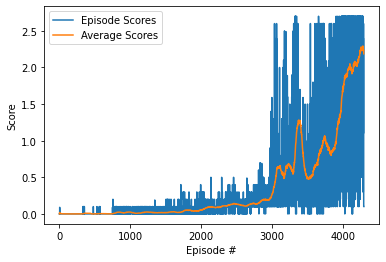

In [9]:
# plot the scores
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episode_scores)), episode_scores)
plt.plot(np.arange(len(average_scores)), average_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(["Episode Scores", "Average Scores"])
plt.show()

In [6]:
env.close()

## 6. Watch a smart Agent
If you trained the agent or you just want to see a trained agent behavior, don't forget to __restart the notebook__ and run the section below.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import platform
from src.agent import Agent
from collections import deque
from src.train import train_multiagent

platform_files = {"Windows":r".\ENVs\Tennis_Windows_x86_64\Tennis.exe",
                 "Linux":r"./ENVs/Tennis_Linux/Tennis.x86_64",
                 "Darwin":r"./ENVs/Tennis.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file , no_graphics=False)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

# Here we initialize two agents
# We set the states size to 48 (24*2), so we can feed each agent boths agent's state observations.
agent_1 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)
agent_2 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)
agent_1.load_brain(agent_prefix="ag_1")
agent_2.load_brain(agent_prefix="ag_2")

# Tesing for 2 episodes. Notice that I set the train_mode parameter to False
# which deactivates the train_mode in ML Agents and prevents learning.
episode_scores, average_scores = train_multiagent(agent_1, agent_2, env, num_agents, n_episodes=2, train_mode=False)

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
